
Explorations in Monte Carlo Methods








History of the Monto Carlo Method.
The Buffon Needle Problem:

Approximating PI with a large amount of random events. We will do this by letting a needle drop on a flat surface. We will generate radnom numbers from a uniform distribution using np.random. Togehter we will generate pairs (x , theta). X being the distance to the nearest line and theta the winkel.

In [3]:
!pip install matplotlib


0.4200750000000013


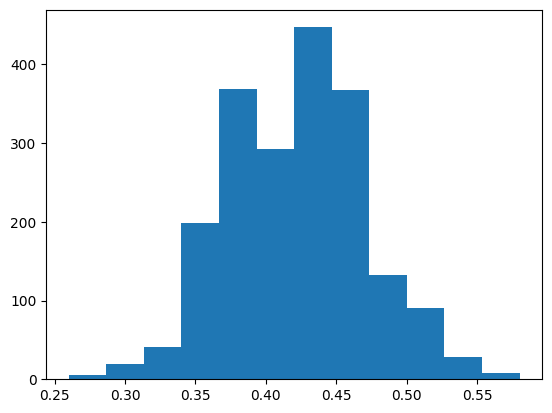

In [10]:
# A super Experiment of the Buffon Needle Problem
# Histogramming the output of all events

import numpy as np
import matplotlib.pyplot as plt


throws = 100 # throws within one experiment
replications = 2000 # replication of one event

y = [0.0] * replications

for i in range(replications):
  x = np.random.rand(throws)
  theta = 0.5 * np.pi + np.random.rand(throws)
  hits = (x <= 0.5 * np.sin(theta)) # construct a boolean list
  y[i] = (sum(hits) / float(throws))

recipEst = sum(y) / float(replications)
#print(recipEst)
vVec = (y - recipEst) * (y - recipEst)
#print(vVec)
v = sum(vVec) / (replications -1)
stddev = np.sqrt(v)
piEst = 1 / recipEst
print(recipEst)
fig = plt.figure()
plt.hist(y, bins=12)
plt.show()




Histrogramming to understand the results of Monte Carlo Experiments. By conducting the experiment one time we get an instance ( one of the possible outcomes). Running the experiment one time is called a trial of the experiment.

Sample Paths: Another method to portray the results of a run are sample Paths. Gambler's ruin: 1 Dollar bets against the house. Gambler starts with 100$ and the Bank with 2000 Dollar. The chance is 50% of winning

ValueError: x and y must have same first dimension, but have shapes (138797,) and (6763,)

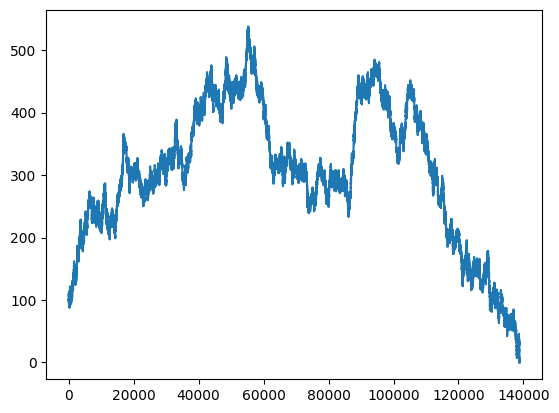

In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
number_of_gamblers = 3
time_series = []
for z in range(number_of_gamblers):
  R = []
  W = random.random()< 0.5
  i = 0; R.append(100) # inital fortune
  while(R[i] > 0 and R[i] < 2000):
      i +=1
      W = (random.random()< 0.5)
      W = 2 * W -1
      R.append(R[i-1] + W)
  time_series.append(R)

# Calculate maximum length of gambler runs
array_of_lenghts = [len(x) for x in time_series]
max_val = array_of_lenghts[0]
for x in array_of_lenghts:
    if x > max:
        max = x

# Generate x-axis values based on max length
x = np.linspace(1, max_val, max_val)

for i in range(len(time_series)):
  plt.plot(x, time_series[i])

plt.show()

Probability:

*   Event E : a possible outcome in a probabilistic Experiment
*   Universe Omega: Set of all possible outcomes
*   Pr(E) is the limit of the fraction of times E occurs in an infinite long sequence of events (number of trails goes against infinity)
* A random varibable is a mapping of outcomes of an Experiment (Omega) to the real numbers (Omega -> R)
* a probability distribution: a function that reports all possible outcomes of an experiment



In [29]:
# lets construct a toin coss Experiment, every coin is tossed twice

#Omega: all possible outcomes of an toin coss
omega = [["H", "H"], ["H", "T"], ["T", "H"], ["T", "T"]]

# possible events would be: at least one head occurs
# a possible random variable would be X = The Number of Heads

# lets create a mapping Omega -> Real Numbers
random_variable ={
    "HH": 2,
    "HT" : 1,
    "TH" : 1,
    "TT" : 0
}



Discrete Random Varibales:
A discrete random variable assumes only finite and countable infinite many outcomes of the experiment. So the cardinality of Omega is finite or coutable infinite.


*   Countable infinity (https://mathinsight.org/definition/countably_infinite) : a set is countable infinite id its elements can be out into corresponcence with the Natural Numbers

Continuous Random Variables:
The cardinality of Omega is non-countable infinite (like the real numbers). Pr(X = x) = 0 for every real value x.






Cumulative distribution Function:
 * cdf(x) = Pr(X <= x); for both discrete and continuous random varibables.
 * lim x -> + infinity cdf(x) -> 1
 * lim x -> - infinity cdf(x) -> 0
 * general true: cdf(x1) <= cdf(x2), if x1 <= x2

In [13]:
# cumulative distribution function for an arbitrary amount of toin cosses.
# random variable will be set for: X = amount of heads

# write a function that accepts to arguments number_of_tosses and x (Pr(X <= x))
# and gives back the cumulative prob for this setup

def faculty(n) -> int:
    if(n == 0):
      return 1
    if (n == 1):
      return 1
    result = 1
    while (n > 0):
      result *= n
      n -=1
    return result


def NchooseK(n, k):
    numerator = faculty(n)
    denominator = faculty(k) * faculty(n -k)
    return numerator / denominator


def cdf_coin_tosses(number_of_tosses, x) -> float :
    if(x > number_of_tosses):
        raise Exception('Invalid Arguments')
    #short cut
    if(x == number_of_tosses):
        return 1
    # everything else
    prob_head = 0.5
    prob_otherwise = 1 - prob_head

    k = 0
    result = 0
    while(k <= x):
      result += NchooseK(number_of_tosses, k) * pow( prob_head, k) * pow(  prob_otherwise, number_of_tosses-k )
      print(f"result for k={k} and the result = {result}")
      k += 1
    return result


res1 = cdf_coin_tosses(2,1)
print(f"The end result: {res1}")


result for k=0 and the result = 0.25
result for k=1 and the result = 0.75
The end result: 0.75


For continuous random variables the cdf either remains constant or increases.

**The Probability Density Function (pdf)**

* for discrete random variables the pdf(x) = Pr(X = x), this is also often called the probability mass function
* for continuous random varibles: pdf(x) lim e -> 0 ( cdf (x) - cdf(x -e) ), since for continuous random variables the Pr(X = x) = 0
* pdf(x) is the acumulation of probability at x (the derivative of the cumulative distribution function)

---
Pr(a < X <= b) = SUM (pdf(x)) = cdf(b) - cdf(a)

pdf(x) = d/dx cdf(x)

Pr(a < X <= b) = INTEGRAL (a,b) pdf(x) dx = cdf(b) - cdf(a)

The cumulative distribution function in itself is given by:

cdf(x) = INTEGRAL(-inf, x) pdf(t)dt

**The Uniform distribution**
The uniform distribution is the most important distribution for monte Carlo methods, since from this distribution sample for every other distribution is derived.

The value of the pdf(x) is equal for all x in Omega

In [4]:
# lets make a discrete unfiform distribution for range  [0,6]
# for every x in range(6) the pdf is 1 / len(range(6))
# Pr(Omega) = 1

interval = [0, 6]
omega = range(0,6)
print(len(omega))

# cumulative distribution function for the uniform distribution is
# start point for integral
#end point for integral
def cdf_uniform_distribution(start, end):
  if(start > end):
    raise Exception('Invalid Arguments')

  omega_length = len(omega)
  diff = end - start
  return diff / omega_length

res = cdf_uniform_distribution(2, 4)

print(res)

6
0.3333333333333333


So, the density function gives information about a specific event in omega. pdf(x). the cumulative is the Integral of the pdf and can give about

**Expected Values and Law of Large Numbers**

(in general in the contiuous case the sum becomes an integral)

* the expected value is the sum of its possibles valus weighted by the probability

* the expectation Value E(r): if an Experiment is run many times the expected value is the limit to which the average trials converge

Law of Large Numbers:
 as the n -> inf , the sample mean goes to the true mean

Typical questions: Calculate the waiting time T until the first 6 appears on the roll of a single dice.

This builds a geometric progression. For this we should use the geometric distribution (a discrete probability distribution that is used for tries before the first sucess).

In [ ]:
# build a function that gives back the expectation value of the sum of the eyes of an arbitrary amount of dice rolled



# build a function that gives back the variance of the

**Conditional Probability**

* in a probabilistic Experiment additional Knowledge makes some outcomes impossible: Pr(A |B) = Pr ( A and B) / Pr (B) , B is acting as the universe because B has already happened.

Decomposition of Events:

* we will devide Omega into sets of outcomes that do not have abaything in commen
* in general conditional probability is about having different amount of information at different points in time (I guess)

Independence of Events:
* two events are independent from each other if Pr(A | B) = Pr(A), the outcomes of these have no effect on each other

The Bayes Formula:
* Answers the question of the conditional Probabilities can be reversed

In [2]:
!pip install csv

ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [ ]:
# The monty hall Problem in Python
# write a Python Program that simulates all Possible sample paths in the Monty Hall Problem and derive
# the probability for switching and not switching from your simulation

import csv

car_is_in = ["one", "two", "three"]
initial_choice = ["one", "two", "three"]

switch = [True, False]

number_of_shows = 100
shows = []

def has_won()

def choose_from_three() -> int:
  pass



def choose_from_two() -> int:
  pass


def simulate_one_show() -> list:
  pass



























